In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_patient = pd.read_csv('dataset.csv')
df_patient_afterDrop = df_patient.drop(
    columns=['encounter_id', 'patient_id', 'd1_diasbp_noninvasive_max', 
    'd1_diasbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 
    'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_mbp_noninvasive_min', 
    'h1_mbp_noninvasive_min', 'h1_sysbp_noninvasive_min', 'h1_sysbp_noninvasive_max', 
    'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_max', 'Unnamed: 83'])

In [6]:
#Create a sheet with # of missing value, percentage of missing value and type of columns
df_patient_naSum = pd.DataFrame(df_patient_afterDrop.isna().sum())
df_patient_naSum = df_patient_naSum.set_axis(['missing_number'], axis = 1)
df_patient_naSum = df_patient_naSum.rename_axis('column_name')
df_patient_naSum['missing_percentage'] = df_patient_naSum['missing_number']/(df_patient_afterDrop.shape[0])
df_patient_naSum['type'] = df_patient_afterDrop.dtypes
df_patient_naSum.to_excel('isna_type.xlsx')

In [9]:
df_patient_afterDrop.columns

Index(['hospital_id', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender',
       'height', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max',
       'h1_diasbp_min', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_resprate_max', 'h1_resprate_min',
       'h1_spo2_max', 'h1_spo

In [20]:
columns_35_50 = ['d1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 
    'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 
    'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 
    'hospital_death']
df_patient_35_50 = df_patient_afterDrop[columns_35_50]
df_patient_35_50

,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,hospital_death
0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,68.0,63.0,0
1,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,61.0,48.0,0
2,96.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,37.0,36.7,88.0,58.0,0
3,116.0,92.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,38.0,34.8,62.0,44.0,0
4,89.0,60.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,37.2,36.7,99.0,68.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,115.0,70.0,109.0,48.0,27.0,9.0,100.0,85.0,128.0,67.0,38.2,36.6,55.0,44.0,0
91709,100.0,76.0,82.0,47.0,33.0,12.0,100.0,45.0,127.0,65.0,37.4,36.1,64.0,56.0,0
91710,158.0,79.0,82.0,57.0,34.0,0.0,99.0,81.0,110.0,75.0,36.9,35.8,NaN,NaN,0
91711,82.0,60.0,108.0,54.0,23.0,14.0,99.0,83.0,153.0,111.0,36.5,36.3,NaN,NaN,0


In [27]:
df_patient_35_50.dtypes

d1_heartrate_max    float64
d1_heartrate_min    float64
d1_mbp_max          float64
d1_mbp_min          float64
d1_resprate_max     float64
d1_resprate_min     float64
d1_spo2_max         float64
d1_spo2_min         float64
d1_sysbp_max        float64
d1_sysbp_min        float64
d1_temp_max         float64
d1_temp_min         float64
h1_diasbp_max       float64
h1_diasbp_min       float64
hospital_death        int64
dtype: object

1. The relationship between heartrate of Patient and death rate

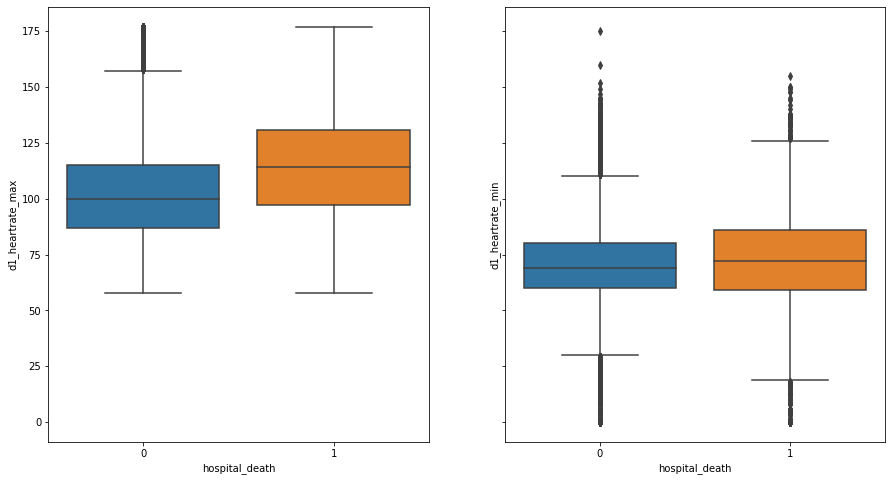

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
sns.boxplot(ax = axes[0], data=df_patient_35_50, y='d1_heartrate_max', x='hospital_death')
sns.boxplot(ax = axes[1], data=df_patient_35_50, y='d1_heartrate_min', x='hospital_death')
plt.show()